In [146]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import transformers
import PyPDF2
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
import concurrent

ImportError: cannot import name 'stopwords' from 'nltk' (/home/finn_thomas/miniconda3/envs/digitensor/lib/python3.11/site-packages/nltk/__init__.py)

In [105]:
def cleanResume(resumeText):
   
    resumeText = re.sub('http\S+\s*', ' ', resumeText)   
    resumeText = re.sub(r'\b\w*@\w*\b', '', resumeText)
    resumeText = re.sub(r'[^A-Za-z\s@._]', '', resumeText)
    resumeText = re.sub(r'\b[A-Z]{2,}\b', '', resumeText)    #code from : https://www.kaggle.com/code/akashkotal/resume-screening-with-nlp
    resumeText = re.sub('RT|cc', ' ', resumeText)  
    resumeText = re.sub('#\S+', '', resumeText)  
    resumeText = re.sub('@\S+', '  ', resumeText)  
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  
    words_to_remove = [' com', ' co', ' uk', ' ac']
    for word in words_to_remove:
        resumeText = resumeText.replace(word, '')
    return resumeText


In [184]:
from nltk.corpus import names
names.words('male.txt')

['Pincas',
 'Pinchas',
 'Pincus',
 'Piotr',
 'Pip',
 'Plato',
 'Pooh',
 'Porter',
 'Poul',
 'Powell',
 'Praneetf',
 'Prasad',
 'Prasun',
 'Prent',
 'Prentice',
 'Prentiss',
 'Prescott',
 'Preston',
 'Price',
 'Prince',
 'Pryce',
 'Puff',
 'Purcell',
 'Putnam',
 'Pyotr',
 'Quent',
 'Quentin',
 'Quiggly',
 'Quigly',
 'Quigman',
 'Quill',
 'Quillan',
 'Quincey',
 'Quincy',
 'Quinlan',
 'Quinn',
 'Quint',
 'Quintin',
 'Quinton',
 'Quintus',
 'Rab',
 'Rabbi',
 'Rabi',
 'Rad',
 'Radcliffe',
 'Rafael',
 'Rafe',
 'Ragnar',
 'Rahul',
 'Raimund',
 'Rainer',
 'Raj',
 'Rajeev',
 'Raleigh',
 'Ralf',
 'Ralph',
 'Ram',
 'Ramesh',
 'Ramon',
 'Ramsay',
 'Ramsey',
 'Rand',
 'Randal',
 'Randall',
 'Randell',
 'Randi',
 'Randie',
 'Randolf',
 'Randolph',
 'Randy',
 'Ransell',
 'Ransom',
 'Raoul',
 'Raphael',
 'Raul',
 'Ravi',
 'Ravil',
 'Rawley',
 'Ray',
 'Raymond',
 'Raymund',
 'Raymundo',
 'Raynard',
 'Rayner',
 'Raynor',
 'Reagan',
 'Red',
 'Redford',
 'Redmond',
 'Reece',
 'Reed',
 'Rees',
 'Reese',
 

In [191]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('names')
def clean_res(text):
    male_names = [name.lower() for name in names.words('male.txt')]
    female_names = [name.lower() for name in names.words('female.txt')]
    
    #female_names = names.words('female.txt')
    cleaned_resume = text.lower()
    
    stop_words = set(stopwords.words('english')+male_names+female_names)
    word_tokens = word_tokenize(cleaned_resume)
    
    filtered_resume = [word for word in word_tokens if word.lower() not in stop_words]
    lemmatizer = WordNetLemmatizer()
    
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_resume]
    alpha_words = [word for word in lemmatized_words if word.isalpha()]
    cleaned_text = ' '.join(alpha_words)
    
    return(cleaned_text)



In [192]:
clean_res(cv[2])

'road hampshire po graduate first class integrated master degree physic astrophysics well versed statistical modelling machine learning computational physic inference skill knowledge python common library numpy scipy kera scikit excellent data visualisation skill matplotlib seaborn excel year project titled watching galaxy collide laser interferometer space antenna lisa space gravitational wave detector used pycbc infer parameter supermassive hole merger matplotlib visualise result keen apply mathematical analytical kill real problem ability experience selected participate hackathon used python data analysis skill anomaly ai ship tracking data model behavior presented finding requiring excellent verbal communication skill utilised geopandas index map data successful python coursework involving de constructing synthetic gravitational wave scipy fourier analysis ode module required granular attention detail well patience additional experience inference model using pymc well machine learn

In [193]:
cv={}
i=0
for filename in (os.listdir(os.getcwd())):
    
    if filename.lower().endswith('.pdf'):
                                                                                        ##Can't enumerate because you don't know that all
                                                                                        ## the files are pdfs, the count will be weird        
        
        reader= PyPDF2.PdfReader(filename)
        text = [reader.pages[page].extract_text() for page in range(len(reader.pages))]
        
        #str(text).replace('\\n','')
        #str(text).replace('\n','')
        text = (str(text))
        cv[i] = clean_res(text)
        i+=1

In [219]:
cv[2]

'road hampshire po graduate first class integrated master degree physic astrophysics well versed statistical modelling machine learning computational physic inference skill knowledge python common library numpy scipy kera scikit excellent data visualisation skill matplotlib seaborn excel year project titled watching galaxy collide laser interferometer space antenna lisa space gravitational wave detector used pycbc infer parameter supermassive hole merger matplotlib visualise result keen apply mathematical analytical kill real problem ability experience selected participate hackathon used python data analysis skill anomaly ai ship tracking data model behavior presented finding requiring excellent verbal communication skill utilised geopandas index map data successful python coursework involving de constructing synthetic gravitational wave scipy fourier analysis ode module required granular attention detail well patience additional experience inference model using pymc well machine learn

In [197]:
df = pd.DataFrame.from_dict(cv,orient='index',columns=['CV'])
df['File']= [filename for filename in os.listdir(os.getcwd()) if filename.lower().endswith('.pdf')]
df=df[['File','CV']]



summarizer = pipeline("summarization", model='sshleifer/distilbart-cnn-12-6', max_length = 256, truncation = True)
    
with concurrent.futures.ThreadPoolExecutor() as executor:
    summaries = list(executor.map(summarizer, df['CV']))

#summaries = summarizer(df['CV'][2])
summaries = [summaries[i][0]['summary_text'] for i in range(len(df))]  ## WHY DO YOU HATE ME ##
df['summarised_cv'] = summaries


Your max_length is set to 256, but your input_length is only 171. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=85)


In [173]:
df = pd.read_csv('Resume.csv')
df = df.sample(5)
df.drop(['Resume_html','ID'],axis=1, inplace=True)
df.reset_index(drop = True, inplace = True)

summarizer = pipeline("summarization", model='sshleifer/distilbart-cnn-12-6', max_length = 256, truncation = True)
    
with concurrent.futures.ThreadPoolExecutor() as executor:
    summaries = list(executor.map(summarizer, df['Resume_str']))

#summaries = summarizer(df['CV'][2])
summaries = [summaries[i][0]['summary_text'] for i in range(len(df))]  ## WHY DO YOU HATE ME ##
df['summarised_cv'] = summaries




In [198]:
df

,File,CV,summarised_cv
0,KathrynEllisLac_CV_Oct2023.pdf,profile sc cleared business consultant excels ...,professional business consultant excels esta...
1,OK_CV.pdf,astrophysicsandcosmologystudent keentolearnand...,astrophysicsandcosmology student keentolearna...
2,Finn_Thomas_CV.pdf,road hampshire po graduate first class integra...,Fourth year university portmouth physic astro...
3,Lola cv 08-2023 - (1).pdf,fadebo tel business analyst sc cleared email n...,Software development cycle developed using wa...


In [199]:
## Play around with label, become more of a description of ddat roles, compare a junor cv vs a senior cv. ##
## More detailed classification (expertise etc) ##
## Share summarisation stuff with Amani.  ## 
#candidate_labels = ['Expert data engineer','Skilled data engineer','Novice data engineer']
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli")

candidate_labels =["data engineer", "data analyst","data scientist"]
categorized_cvs = {}
data_for_inspection = {}
for idx,i in enumerate(df['summarised_cv']):
    
    classi = classifier(i, candidate_labels = candidate_labels)
    
    predicted_label = classi["labels"][0]
    
    predicted_label_score = classi["scores"][0]
    
    categorized_cvs[f'{idx},{predicted_label}'] = predicted_label_score
    
    data_for_inspection[idx] = [classi['labels'],classi['scores']]
                                             
    
    


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [200]:
df['predicted_position'] = list(zip(categorized_cvs.keys(), categorized_cvs.values()))


In [167]:
df['predicted_position'][1][1]

0.550039529800415

In [201]:
df['distribution_of_scores'] = data_for_inspection

['apprentice data engineer', 'skilled data engineer', 'expert data engineer', 'lead data engineer']
0.5024289328139275


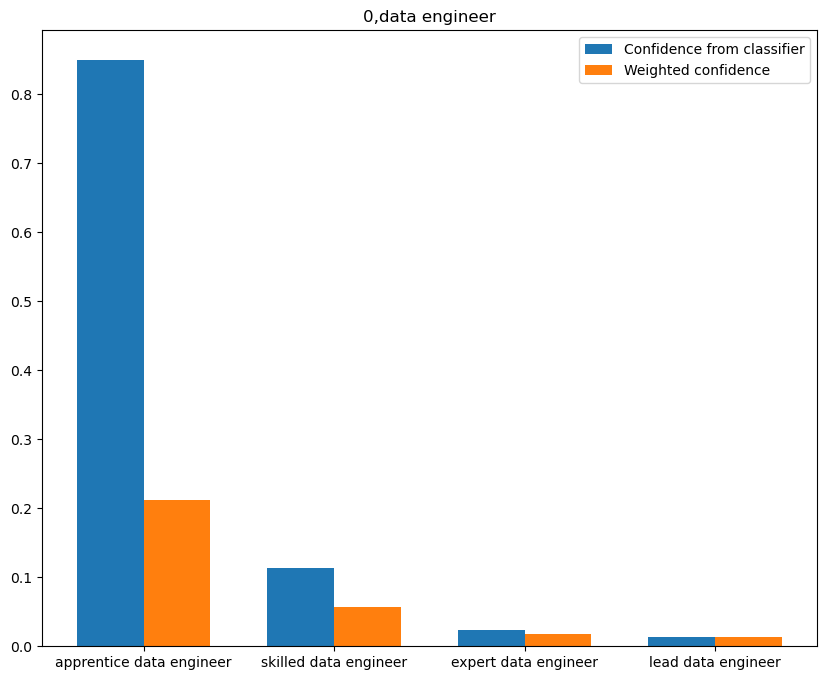

['apprentice data analyst', 'skilled data analyst', 'expert data analyst', 'lead data analyst']
0.6870850864797831


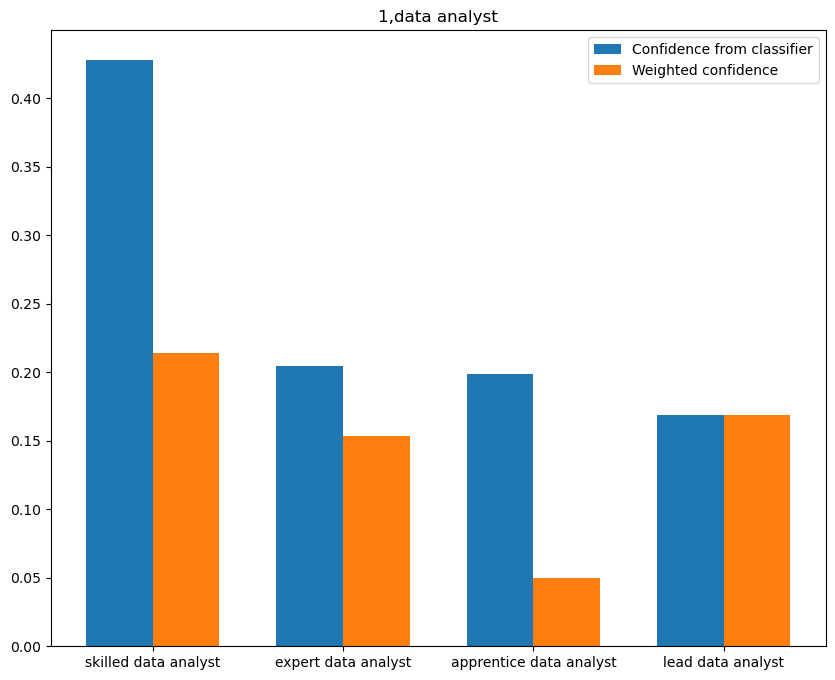

['apprentice data scientist', 'skilled data scientist', 'expert data scientist', 'lead data scientist']
0.6881352080963552


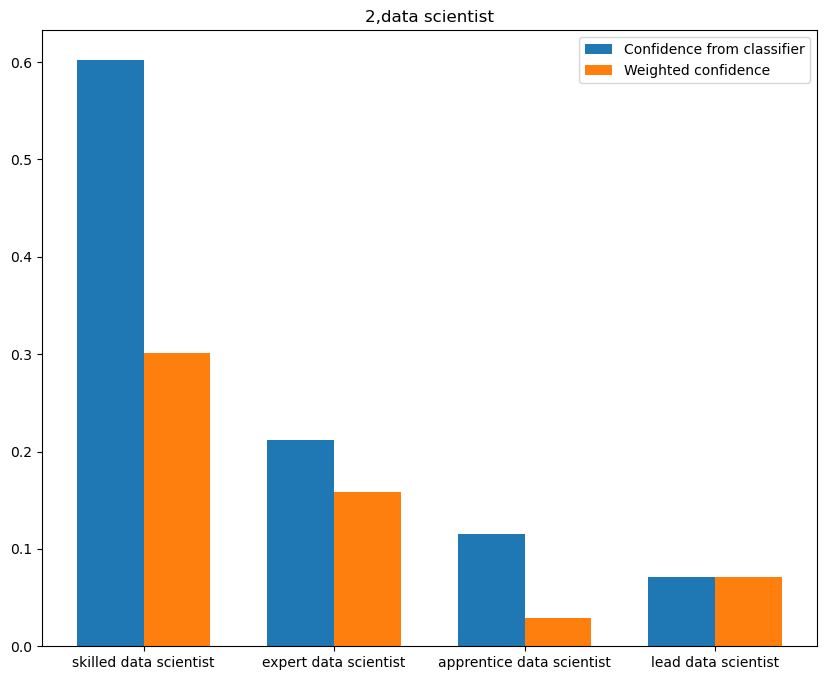

['apprentice data analyst', 'skilled data analyst', 'expert data analyst', 'lead data analyst']
0.9323071828112006


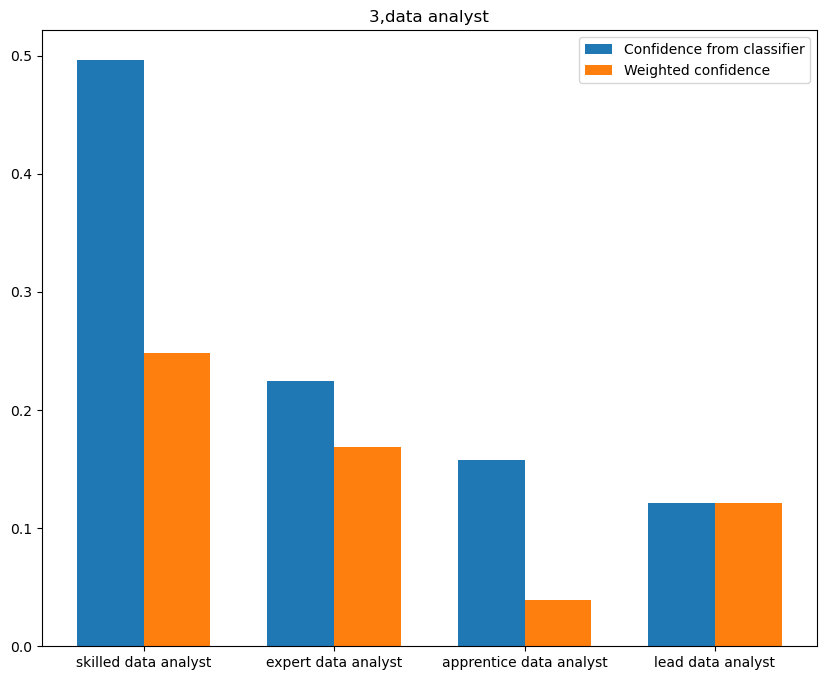

In [205]:
levels = ['apprentice','skilled','expert','lead']
categorized_skills = {}
weights = {'apprentice': .25, 'skilled': .5, 'expert': .75, 'lead': 1}
weighted_mean_score = []

for idx,i in enumerate(categorized_cvs.keys()):
    result_list = [level + ' ' + i for level in levels]
    result_list = ["".join(char for char in string if not char.isdigit() and char != ',') for string in result_list]

    print(result_list)
    

    
    classi = classifier(i, candidate_labels = result_list)
    #weighted_scores = classi['scores'] * weights
    #print(weighted_scores)
    predicted_label = classi["labels"][0]

    
    predicted_label_score = classi["scores"][0]
    categorized_skills[f'{predicted_label} {idx}']= predicted_label_score


    scores_array = np.array(classi['scores'])

    
    weighted_scores = [score * weights[label.split()[0]] for label, score in zip(classi['labels'], classi['scores'])]    
    #print("Normal scores", classi['scores'],"Weighted scores", weighted_scores)
    weighted_mean = np.mean(weighted_scores) + df['predicted_position'][idx][1]
    print(weighted_mean)
    weighted_mean_score.append(round(weighted_mean,3))
    
    plt.figure(figsize = (10,8))
    bar_positions1 = np.arange(len(classi['labels']))
    bar_positions2 = bar_positions1 + .35
    #plt.bar(classi['labels'],classi['scores'])
    plt.bar(bar_positions1,classi['scores'],width=.35, label='Confidence from classifier')
    plt.bar(bar_positions2,weighted_scores,width=.35, label = 'Weighted confidence')
    plt.title(i)
    plt.xticks(bar_positions1 + .35 / 2, classi['labels'])
    plt.legend()
    plt.show()
   

In [207]:
df['Weighted sum of scores'] = weighted_mean_score
## IMplement comprehensive sanitisation, before write up ## 

'road hampshire po graduate first class integrated master degree physic astrophysics well versed statistical modelling machine learning computational physic inference skill knowledge python common library numpy scipy kera scikit excellent data visualisation skill matplotlib seaborn excel year project titled watching galaxy collide laser interferometer space antenna lisa space gravitational wave detector used pycbc infer parameter supermassive hole merger matplotlib visualise result keen apply mathematical analytical kill real problem ability experience selected participate hackathon used python data analysis skill anomaly ai ship tracking data model behavior presented finding requiring excellent verbal communication skill utilised geopandas index map data successful python coursework involving de constructing synthetic gravitational wave scipy fourier analysis ode module required granular attention detail well patience additional experience inference model using pymc well machine learn

In [208]:
df[df['Weighted sum of scores']>0.6]

,Resume_str,Category,summarised_cv,predicted_position,Weighted sum of scores
3,MANAGEMENT AND PROGRAM ANALYSIS ...,AVIATION,"Human services degree, ARCOM award for succes...","(3,data analyst, 0.5856937170028687)",0.66


In [135]:
sort = list(zip(classi['labels'], classi['scores']))

# Sort pairs based on scores
sort = sorted(sort, key=lambda x: x[0])

# Extract sorted categories
sorted_categories = [pair[0] for pair in sorted_category_score_pairs]

# Display the result
print(sorted_categories)

['expert data analyst', 'lead data analyst', 'novice data analyst', 'skilled data analyst']


In [136]:
weights = [.75,1,.25,.5]
sorted_dict = dict(sort)

In [151]:
classi

{'sequence': 'data engineer',
 'labels': ['skilled data engineer',
  'expert data engineer',
  'lead data engineer',
  'novice data engineer'],
 'scores': [0.7279922962188721,
  0.20225790143013,
  0.05693909898400307,
  0.012810736894607544]}

In [105]:
weighted_scores = [a * b for a, b in zip(weights, sorted_dict.items())]

TypeError: can't multiply sequence by non-int of type 'float'

<BarContainer object of 4 artists>

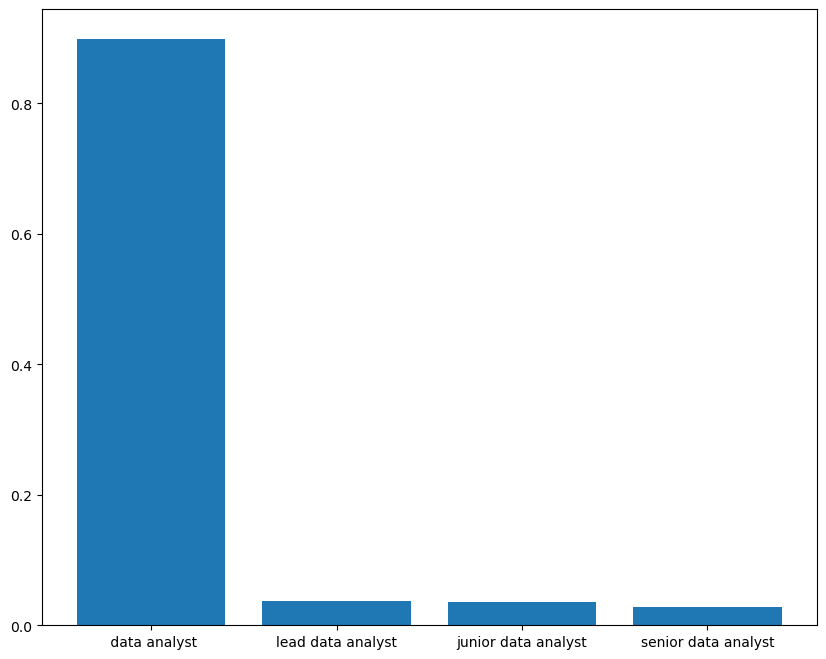

In [42]:
plt.figure(figsize = (10,8))

plt.bar(classi['labels'],classi['scores'])

In [40]:
df['predicted_skill_level'] = list(zip(categorized_skills.keys(), categorized_skills.values()))
df

,File,CV,summarised_cv,predicted_position,distribution_of_scores,predicted_skill_level
0,KathrynEllisLac_CV_Oct2023.pdf,['Kathryn Ellis -Lac 07919 141 858 | kath.dac ...,ITIL is a leading provider of a range of servi...,"(data engineer, 0.3714955747127533)","[[data engineer, data analyst, data scientist,...","(skilled data engineer 0, 0.6034407615661621)"
1,Finn_Thomas_CV.pdf,"['Finn Thomas 15D Nelson Road, Hampshire, PO 5...",a first class integrated master s degree in Ph...,"(data scientist, 0.6749975085258484)","[[data scientist, data analyst, data engineer,...","(skilled data scientist 1, 0.6438412070274353)"
2,Lola cv 08-2023 - (1).pdf,['Lola Fadebo Tel: 074916774400 Senior Busines...,a focused business analyst with five years exp...,"(data analyst, 0.860136866569519)","[[data analyst, data engineer, performance ana...","(skilled data analyst 2, 0.5387518405914307)"


In [13]:
levels = ['apprentice','skilled','expert','lead']
skill_level = {}
for i,pos in enumerate(categorized_cvs.keys()):
    result_list = [level + ' ' + pos for level in levels]
    
    #if type(categorized_cvs[pos])==dict:
        
    classi = classifier(df['summarised_cv'][i], candidate_labels = result_list)
    skill_level[i] = [classi['labels'],classi['scores']]
    print(classi['labels'],classi['scores'])
    #print(np.std(classi['scores']))

['skilled data engineer', 'expert data engineer', 'lead data engineer', 'apprentice data engineer'] [0.34298762679100037, 0.3023093342781067, 0.19492848217487335, 0.15977463126182556]
0.07509403176741557
['skilled data scientist', 'expert data scientist', 'lead data scientist', 'apprentice data scientist'] [0.6157280206680298, 0.3256123960018158, 0.05066346004605293, 0.00799607764929533]
0.24381097910308877
['skilled data analyst', 'expert data analyst', 'lead data analyst', 'apprentice data analyst'] [0.6291217803955078, 0.3617139458656311, 0.006319758482277393, 0.0028444849886000156]
0.2630015393385629


In [14]:
skill_levels = [skill_level[i][0][0] for i in range(len(skill_level.keys()))]
skill_confidence =  [skill_level[i][1][0] for i in range(len(skill_level.keys()))]
#skill_levels = zip(skill_levels,skill_confidence)

In [256]:
df.to_csv('cv_sift_test.csv')

In [15]:
df['predicted_level_of_skill'] = skill_levels
df['confidence_of_skill'] = skill_confidence
df

,File,CV,summarised_cv,predicted_position,predicted_level_of_skill,confidence_of_skill
0,KathrynEllisLac_CV_Oct2023.pdf,['Kathryn Ellis -Lac 07919 141 858 | kath.dac ...,ITIL is a leading provider of a range of servi...,"(data engineer, 0.4266619384288788)",skilled data engineer,0.342988
1,Finn_Thomas_CV.pdf,"['Finn Thomas 15D Nelson Road, Hampshire, PO 5...",a first class integrated master s degree in Ph...,"(data scientist, 0.37032124400138855)",skilled data scientist,0.615728
2,Lola cv 08-2023 - (1).pdf,['Lola Fadebo Tel: 074916774400 Senior Busines...,a focused business analyst with five years exp...,"(data analyst, 0.7054091095924377)",skilled data analyst,0.629122


In [50]:
classifier = pipeline("zero-shot-classification")
candidate_labels =["data engineer", "data analyst","data scientist"]
#candidate_labels = ['Junior data engineer','Senior data engineer','Lead data engineer']
candidate_scores = {}

# Iterate over each entry
for i, sum_cv in enumerate(df['CV']):
    # Initialize the inner dictionary to store competencies and scores for the current entry
    entry_dict = {}
    
    # Iterate over each candidate label
    for cand_label in candidate_labels:
        # Perform zero-shot classification
        classi = classifier(sum_cv, candidate_labels=[cand_label])
        
        # Check if classi is not empty and has the required keys
        if classi and 'labels' in classi and 'scores' in classi:
            # Extract the labels and scores
            labels = classi['labels']
            scores = classi['scores']
            
            # Add the competencies and scores to the entry_dict
            entry_dict.update(dict(zip(labels, scores)))
    
    # Add the entry_dict to candidate_scores with the entry name as the key
    candidate_scores[i] = entry_dict

# Print the resulting dictionary
print(candidate_scores)
    
    

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


KeyboardInterrupt: 

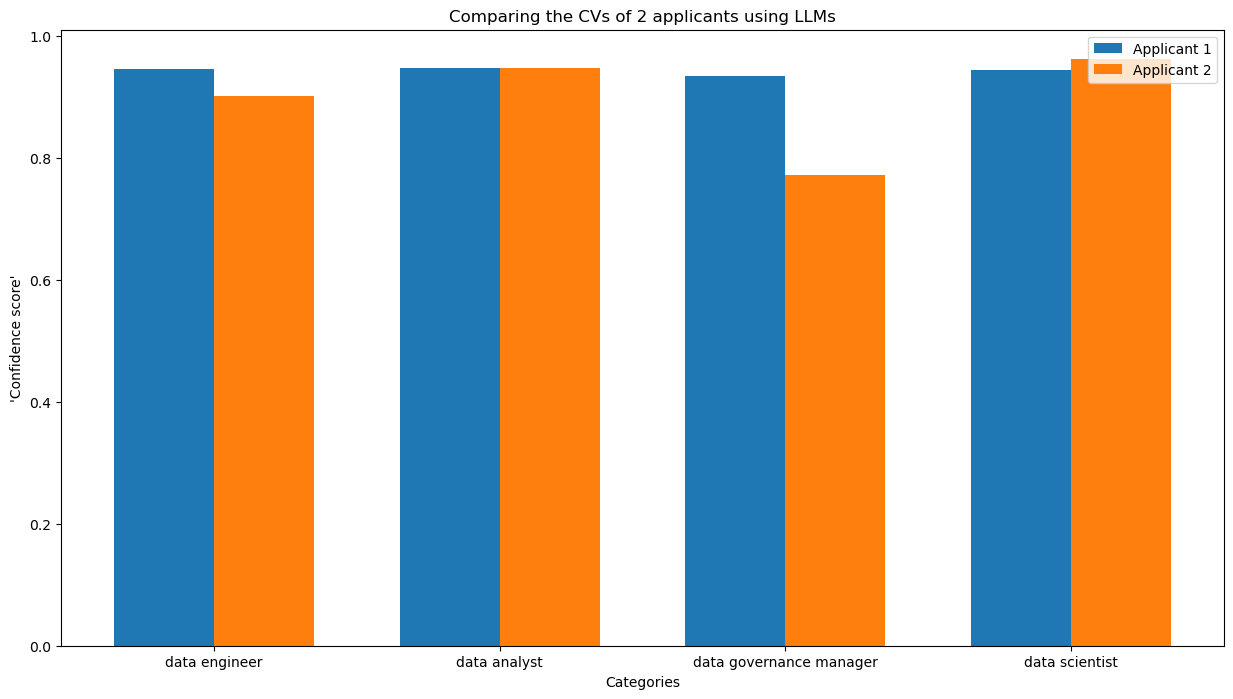

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure(figsize=(15,8))
categories = candidate_labels
data1 = candidate_scores[0].values()
data2 = candidate_scores[1].values()

# Create a bar chart
bar_width = 0.35  # Set the width of the bars

# Calculate the positions for the bars
bar_positions1 = np.arange(len(categories))
bar_positions2 = bar_positions1 + bar_width

# Plot the bars
plt.bar(bar_positions1, data1, width=bar_width, label='Applicant 1')
plt.bar(bar_positions2, data2, width=bar_width, label='Applicant 2')

# Customize the chart
plt.xlabel('Categories')
plt.ylabel("'Confidence score'")
plt.title('Comparing the CVs of 2 applicants using LLMs')
plt.xticks(bar_positions1 + bar_width / 2, categories)  # Center the x-axis labels
plt.legend()

# Show the chart
plt.show()
plt.savefig("cv.png")

In [80]:
from transformers import pipeline
summarizer = pipeline("summarization", model='t5-base', max_length = 213)
summed_text=summarizer(
    df['CV'][1][:2000]
)

/home/finn_thomas/miniconda3/envs/digitensor/lib/python3.11/site-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [11]:
summed_text[0]['summary_text']

'multi-skilled business consultant excels in establishing the highest standards of project team delivery and governance . breadth of expertise, from cyber security (TOM / IAM), Operational Support and military systems requirements engineering . demonstrated high degree of tenacity and personal resilience .'

In [46]:
classifier = pipeline("zero-shot-classification")
candidate_label =["data analysis", "data development","data integration","data management","communication"]
candidate_scores={}
for i in candidate_label:
    classi = classifier(
    summed_text[0]['summary_text'],
    candidate_labels= i
    
        )
    candidate_scores[i] = classi['scores']

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


NameError: name 'summed_text' is not defined

In [82]:
scores = list(candidate_scores.values())
scores = np.reshape(scores, (5))


<BarContainer object of 5 artists>

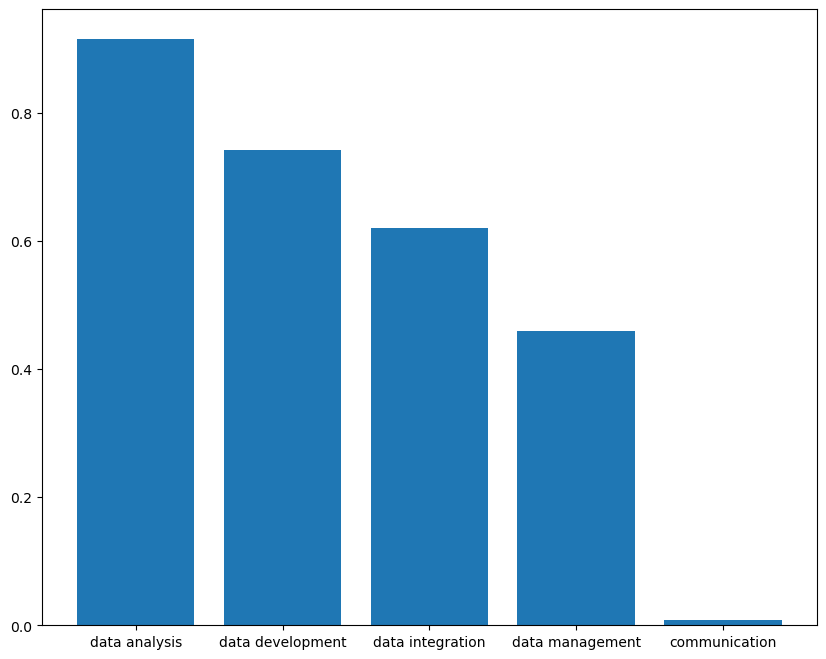

In [83]:
plt.figure(figsize = (10,8))
plt.bar(list(candidate_scores.keys()),scores)

In [66]:
cv_compare= [df['CV'][1],summed_text[0]['summary_text']]
check_loss = {}
for count,i in enumerate(cv_compare):
    classi =  classifier(
    i,
    candidate_labels=["data analysis", "data development","data integration","data management","communication"],
    )
    check_loss[count] = [[classi['labels'],classi['scores']]]
    

(5,)

In [67]:
check_loss[0][0]

[['communication',
  'data analysis',
  'data management',
  'data development',
  'data integration'],
 [0.2877987027168274,
  0.217672660946846,
  0.18363946676254272,
  0.1742737740278244,
  0.13661536574363708]]

In [144]:
combined_list_one = list(zip(*check_loss[0][0]))
combined_list_two = list(zip(*check_loss[1][0]))


# Sort both lists based on the keywords
sorted_list_one = sorted(combined_list_one, key=lambda x: x[0])
sorted_list_two = sorted(combined_list_two, key=lambda x: x[0])
unpack = list(zip(*sorted_list_one))
unpack2 = list(zip(*sorted_list_two))
unpack2[0]

('Finance', 'HR', 'data-analyst', 'data-engineer', 'education', 'python')

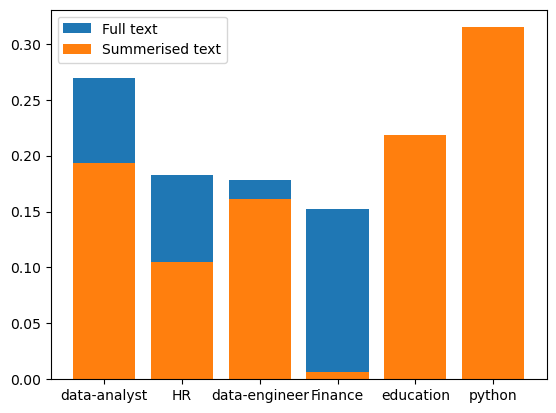

In [122]:
plt.bar(check_loss[0][0][0],check_loss[0][0][1],  label = 'Full text')
plt.bar(check_loss[1][0][0],check_loss[1][0][1], label = 'Summerised text')
plt.legend()

<BarContainer object of 6 artists>

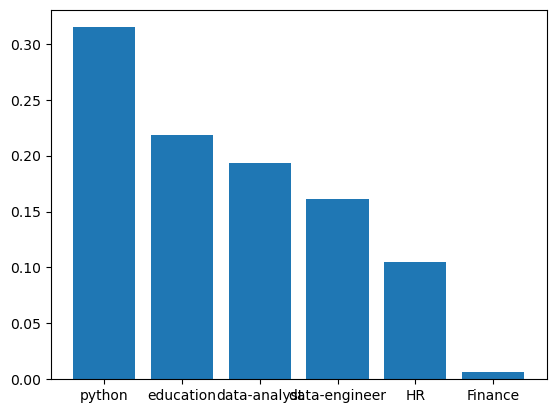

In [109]:
plt.bar(check_loss[1][0][0],check_loss[1][0][1])

In [138]:
#model_path = 'ahxt/LiteLlama-460M-1T'

#model = AutoModelForCausalLM.from_pretrained(model_path)
#tokenizer = AutoTokenizer.from_pretrained(model_path)
text_generator = pipeline("text-generation", model='bigscience/bloom-560m', tokenizer=tokenizer)

# Generate text
prompt = "What is the meaning of life?"
generated_text = text_generator(prompt, max_length=100, num_return_sequences=1)

print(generated_text)

[{'generated_text': 'What is the meaning of life?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16 life�?\x16'}]
